In [1]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision import models
import torch.nn as nn
import os
from PIL import Image
import matplotlib.pyplot as plt


In [2]:
num_classes = 21

In [3]:
class CityscapesDataset(Dataset):
    def __init__(self, image_dir, label_dir, transform=None):
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.image_paths = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith(".png")]
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        label_path = os.path.join(self.label_dir, os.path.basename(image_path))

        image = Image.open(image_path).convert("RGB")
        label = Image.open(label_path).convert("L")  

        if self.transform:
            image = self.transform(image)
            
            label = transforms.Resize((224, 224))(label)  
            label = transforms.ToTensor()(label)  

       
        label = (label * (num_classes - 1)).long().squeeze(0)
        label = torch.clamp(label, 0, num_classes - 1)  

        return image, label


In [4]:
train_image_path = r"C:\Users\soham\OneDrive\Desktop\VLM\train\img-20250330T091322Z-001\img"
train_label_path = r"C:\Users\soham\OneDrive\Desktop\VLM\train\label-20250330T091322Z-001\label"
val_image_path = r"C:\Users\soham\OneDrive\Desktop\VLM\val\img-20250330T091158Z-001\img"
val_label_path = r"C:\Users\soham\OneDrive\Desktop\VLM\val\label-20250330T091158Z-001\label"

In [5]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [6]:
train_dataset = CityscapesDataset(train_image_path, train_label_path, transform)
val_dataset = CityscapesDataset(val_image_path, val_label_path, transform)

In [7]:
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=0)
val_dataloader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=0)

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [9]:
model = models.segmentation.deeplabv3_resnet50(pretrained=True)
model.classifier[4] = nn.Conv2d(256, num_classes, kernel_size=1)  
model.to(device)

c:\Users\soham\anaconda3\envs\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\soham\anaconda3\envs\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [10]:
model = models.segmentation.deeplabv3_resnet50(pretrained=True)
model.classifier[4] = nn.Conv2d(256, num_classes, kernel_size=1) 
model.to(device)


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5, weight_decay=1e-4)
epochs = 50

In [15]:
from tqdm import tqdm

for epoch in range(epochs):
    model.train()
    total_loss, correct, total = 0, 0, 0

  
    for images, labels in tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{epochs}", leave=False):
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)['out']  
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        # Compute accuracy
        predicted = outputs.argmax(dim=1)
        correct += (predicted == labels).sum().item()
        total += labels.numel()

    avg_train_loss = total_loss / len(train_dataloader)
    train_accuracy = 100. * correct / total
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")


Epoch 1/50, Train Loss: 1.5455, Train Accuracy: 59.71%


Epoch 2/50, Train Loss: 1.3990, Train Accuracy: 61.25%


Epoch 3/50, Train Loss: 1.3084, Train Accuracy: 63.11%


Epoch 4/50, Train Loss: 1.2461, Train Accuracy: 64.61%


Epoch 5/50, Train Loss: 1.1888, Train Accuracy: 66.30%


Epoch 6/50, Train Loss: 1.1452, Train Accuracy: 67.55%


Epoch 7/50, Train Loss: 1.1074, Train Accuracy: 68.69%


Epoch 8/50, Train Loss: 1.0765, Train Accuracy: 69.46%


Epoch 9/50, Train Loss: 1.0435, Train Accuracy: 70.47%


Epoch 10/50, Train Loss: 1.0247, Train Accuracy: 70.95%


Epoch 11/50, Train Loss: 0.9998, Train Accuracy: 71.61%


Epoch 12/50, Train Loss: 0.9838, Train Accuracy: 72.02%


Epoch 13/50, Train Loss: 0.9651, Train Accuracy: 72.55%


Epoch 14/50, Train Loss: 0.9472, Train Accuracy: 72.97%


Epoch 15/50, Train Loss: 0.9363, Train Accuracy: 73.27%


Epoch 16/50, Train Loss: 0.9265, Train Accuracy: 73.46%


Epoch 17/50, Train Loss: 0.9084, Train Accuracy: 73.95%


Epoch 18/50, Train Loss: 0.8963, Train Accuracy: 74.28%


Epoch 19/50, Train Loss: 0.8848, Train Accuracy: 74.56%


Epoch 20/50, Train Loss: 0.8757, Train Accuracy: 74.81%


Epoch 21/50, Train Loss: 0.8667, Train Accuracy: 75.02%


Epoch 22/50, Train Loss: 0.8560, Train Accuracy: 75.30%


Epoch 23/50, Train Loss: 0.8486, Train Accuracy: 75.47%


Epoch 24/50, Train Loss: 0.8380, Train Accuracy: 75.74%


Epoch 25/50, Train Loss: 0.8327, Train Accuracy: 75.86%


Epoch 26/50, Train Loss: 0.8250, Train Accuracy: 76.06%


Epoch 27/50, Train Loss: 0.8151, Train Accuracy: 76.29%


Epoch 28/50, Train Loss: 0.8126, Train Accuracy: 76.34%


Epoch 29/50, Train Loss: 0.8059, Train Accuracy: 76.50%


Epoch 30/50, Train Loss: 0.8037, Train Accuracy: 76.56%


Epoch 31/50, Train Loss: 0.7934, Train Accuracy: 76.83%


Epoch 32/50, Train Loss: 0.7842, Train Accuracy: 77.04%


Epoch 33/50, Train Loss: 0.7792, Train Accuracy: 77.14%


Epoch 34/50, Train Loss: 0.7757, Train Accuracy: 77.21%


Epoch 35/50, Train Loss: 0.7692, Train Accuracy: 77.40%


Epoch 36/50, Train Loss: 0.7633, Train Accuracy: 77.54%


Epoch 37/50, Train Loss: 0.7651, Train Accuracy: 77.46%


Epoch 38/50, Train Loss: 0.7555, Train Accuracy: 77.71%


Epoch 39/50, Train Loss: 0.7490, Train Accuracy: 77.88%


Epoch 40/50, Train Loss: 0.7454, Train Accuracy: 77.97%


Epoch 41/50, Train Loss: 0.7429, Train Accuracy: 77.98%


Epoch 42/50, Train Loss: 0.7392, Train Accuracy: 78.08%


Epoch 43/50, Train Loss: 0.7315, Train Accuracy: 78.27%


Epoch 44/50, Train Loss: 0.7296, Train Accuracy: 78.30%


Epoch 45/50, Train Loss: 0.7247, Train Accuracy: 78.41%


Epoch 46/50, Train Loss: 0.7228, Train Accuracy: 78.46%


Epoch 47/50, Train Loss: 0.7211, Train Accuracy: 78.49%


Epoch 48/50, Train Loss: 0.7143, Train Accuracy: 78.66%


Epoch 49/50, Train Loss: 0.7106, Train Accuracy: 78.72%


Epoch 50/50, Train Loss: 0.7067, Train Accuracy: 78.81%


In [ ]:
def visualize_one_image(dataset, model, index=0):
    image, label = dataset[index]
    image_input = image.unsqueeze(0).to(device)

    model.eval()
    with torch.no_grad():
        output_dict = model(image_input) 
        output = output_dict["out"]  
        predicted_label = torch.argmax(output, dim=1).cpu().squeeze(0)

    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    ax[0].imshow(image.permute(1, 2, 0))  
    ax[0].set_title("Input Image")
    ax[1].imshow(label, cmap="gray")
    ax[1].set_title("Ground Truth Label")
    ax[2].imshow(predicted_label, cmap="gray")
    ax[2].set_title("Predicted Label")
    plt.show()


In [18]:
torch.save(model.state_dict(), "model.pth")

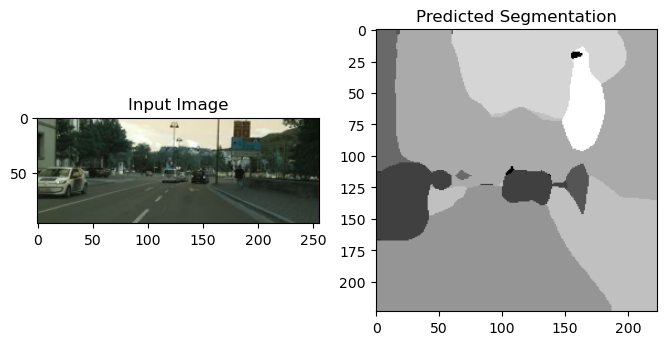

In [27]:


def predict_custom_image(model, image_path):
    
    image = Image.open(image_path).convert("RGB")


    transform = transforms.Compose([
        transforms.Resize((224, 224)),  
        transforms.ToTensor(),         
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
    ])

    image_tensor = transform(image).unsqueeze(0).to(device) 

 
    model.eval()
    with torch.no_grad():
        output_dict = model(image_tensor)  
        output = output_dict["out"]  
        predicted_label = torch.argmax(output, dim=1).cpu().squeeze(0)

    # Show results
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].imshow(image)
    ax[0].set_title("Input Image")
    ax[1].imshow(predicted_label, cmap="gray")
    ax[1].set_title("Predicted Segmentation")
    plt.show()

# Example usage
image_path = r"C:\Users\soham\OneDrive\Desktop\VLM\train\img-20250330T091322Z-001\img\train709.png"
predict_custom_image(model, image_path)


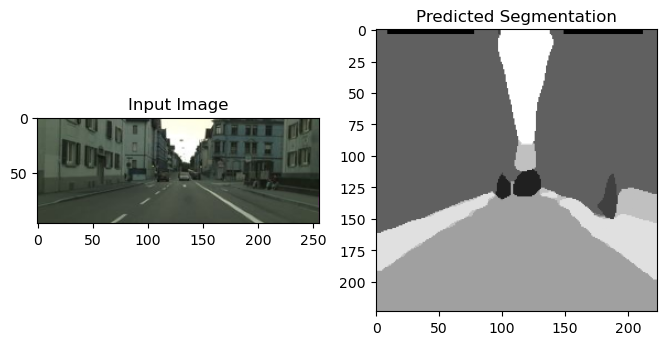

In [32]:
image_path = r"C:\Users\soham\OneDrive\Desktop\VLM\train\img-20250330T091322Z-001\img\train1798.png"
predict_custom_image(model, image_path)
